<a href="https://colab.research.google.com/github/nuritb/StudentsGradePrediction/blob/master/Deep_learning_exe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student grade prediction
A machine learning project by Nurit Biber & Amir Ofir

Dataset is available at https://www.kaggle.com/dipam7/student-grade-prediction \
(Direct download @ https://cutt.ly/me6hvg3)

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['student-mat.csv'].decode('utf-8')))

In [0]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
columns  = df.columns;
for coloumn in columns :
    if (not str(df[coloumn].dtype).startswith("int")):
            print("Coloum Name:",coloumn, ", Type:", df[coloumn].dtype, ", Unique values:", df[coloumn].unique(), "\n")
            values = df[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            df[coloumn] = [convertor[item] for item in df[coloumn]]

print("Total:", len(df.columns), "Columns")

Coloum Name: school , Type: object , Unique values: ['GP' 'MS'] 

Coloum Name: sex , Type: object , Unique values: ['F' 'M'] 

Coloum Name: address , Type: object , Unique values: ['U' 'R'] 

Coloum Name: famsize , Type: object , Unique values: ['GT3' 'LE3'] 

Coloum Name: Pstatus , Type: object , Unique values: ['A' 'T'] 

Coloum Name: Mjob , Type: object , Unique values: ['at_home' 'health' 'other' 'services' 'teacher'] 

Coloum Name: Fjob , Type: object , Unique values: ['teacher' 'other' 'services' 'health' 'at_home'] 

Coloum Name: reason , Type: object , Unique values: ['course' 'other' 'home' 'reputation'] 

Coloum Name: guardian , Type: object , Unique values: ['mother' 'father' 'other'] 

Coloum Name: schoolsup , Type: object , Unique values: ['yes' 'no'] 

Coloum Name: famsup , Type: object , Unique values: ['no' 'yes'] 

Coloum Name: paid , Type: object , Unique values: ['no' 'yes'] 

Coloum Name: activities , Type: object , Unique values: ['no' 'yes'] 

Coloum Name: nursery

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

y = np.asarray([df.G3]).T
X = df.drop('G3', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("X_train:")
print(X_train.head())
print(X_train.shape)

print("\nX_test:")
print(X_test.head())
print(X_test.shape)

print("\ny_train:")
# print(y_train.head)
print(y_train.shape)

print("\ny_test:")
# print(y_test.head())
print(y_test.shape)

X_train:
     school  sex  age  address  famsize  ...  Walc  health  absences  G1  G2
302       0    0   17        0        0  ...     1       3         0  15  12
111       0    0   16        1        0  ...     1       2         0   7  10
258       0    1   18        0        0  ...     2       4         8  15  14
336       0    0   19        1        0  ...     2       5        12  14  13
360       1    0   18        1        1  ...     4       5         0  13  13

[5 rows x 32 columns]
(316, 32)

X_test:
     school  sex  age  address  famsize  ...  Walc  health  absences  G1  G2
69        0    0   15        1        1  ...     3       3        12  16  16
288       0    1   18        0        0  ...     3       2         6  15  14
27        0    1   15        0        0  ...     4       1         4  15  16
385       1    0   18        1        0  ...     3       4         2  10   9
151       0    1   16        0        1  ...     5       5         6  12  13

[5 rows x 32 columns]
(7

In [0]:
%tensorflow_version '1.x' # <-- This ensures that colab will use 1.x version and more important will disable the annoying notificatoin massage
import tensorflow as tf

Unknown TensorFlow version: '1.x' # <-- This ensures that colab will use 1.x version and more important will disable the annoying notificatoin massage
Currently selected TF version: 1.x
Available versions:
 * 1.x
 * 2.x


## Linear Regression with BGD


**First attempt:** \
Starting with basic code,\
learning rate decay - tried to find the starting point
learning rate 0.001
**Loss** is 3.1772747 for 100000 epochs, (lambda is 000.1)

for 500000 the Loss is 3.1754684 - NOT GOOD ENOUGHT!


In [0]:
features = len(df.columns) -1
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
learning_rate = tf.placeholder(tf.float32, [])
update = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

lr = 1e-2
print(lr)
for i in range(0,100):
    sess.run(update, feed_dict = {x:data_x, y_:data_y, learning_rate: 0.001})
    print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))
    if i % 100 == 0:
      print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

0.01
Iteration: 0  b: [0.02047469]  loss: 22.256939
Iteration: 0  b: [0.02047469]  loss: 22.256939
Iteration: 1  b: [0.0139609]  loss: 12.945576
Iteration: 2  b: [0.01531774]  loss: 11.654801
Iteration: 3  b: [0.01437487]  loss: 11.103488
Iteration: 4  b: [0.01410293]  loss: 10.660964
Iteration: 5  b: [0.0136371]  loss: 10.265457
Iteration: 6  b: [0.01323155]  loss: 9.905498
Iteration: 7  b: [0.01281358]  loss: 9.575287
Iteration: 8  b: [0.01240562]  loss: 9.270562
Iteration: 9  b: [0.01200214]  loss: 8.987984
Iteration: 10  b: [0.01160556]  loss: 8.724891
Iteration: 11  b: [0.01121582]  loss: 8.479133
Iteration: 12  b: [0.01083347]  loss: 8.248959
Iteration: 13  b: [0.01045873]  loss: 8.032912
Iteration: 14  b: [0.01009185]  loss: 7.829774
Iteration: 15  b: [0.00973295]  loss: 7.6385
Iteration: 16  b: [0.00938214]  loss: 7.458196
Iteration: 17  b: [0.00903947]  loss: 7.2880745
Iteration: 18  b: [0.00870494]  loss: 7.127443
Iteration: 19  b: [0.00837855]  loss: 6.9756756
Iteration: 20 

**Second attempt**\
on higher learning rate the loss is nan, it seems due to multiples updates with higher learning rate model parameters values vanishes.

In [0]:
features = len(df.columns) -1
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 10000 == 0 :
      print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  b: [2.101899]  loss: 1970063.2
Iteration: 10000  b: [nan]  loss: nan
Iteration: 20000  b: [nan]  loss: nan
Iteration: 30000  b: [nan]  loss: nan
Iteration: 40000  b: [nan]  loss: nan
Iteration: 50000  b: [nan]  loss: nan
Iteration: 60000  b: [nan]  loss: nan
Iteration: 70000  b: [nan]  loss: nan
Iteration: 80000  b: [nan]  loss: nan
Iteration: 90000  b: [nan]  loss: nan


**Third attempt**\
To estimate a large number of parameters, and to penalize some of them because we believe they should have little effect compared to the others.

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

regularization using Lasso (to eliminate some of your input variable as not contributing to the output.)  - not good, Loss increased by 3.4114296 

lambda is 0.1, Loss 3.4114296

lambda is 0.05, Loss is 3.248849

lambda is 0.01, Loss is 3.0354862


In [0]:
features = len(df.columns) -1
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.truncated_normal([features,1]))
b = tf.Variable(tf.truncated_normal([1]))
y = tf.matmul(x,W) + b
lambda_ = 0.005
loss = tf.reduce_mean(tf.pow(y - y_, 2)) + lambda_*tf.reduce_sum(tf.abs(W))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 10000 == 0 :
      
      print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  b: [1.0410265]  loss: 44.12113
Iteration: 10000  b: [0.89799094]  loss: 3.6418567
Iteration: 20000  b: [0.85059965]  loss: 3.633956
Iteration: 30000  b: [0.8057051]  loss: 3.6335628
Iteration: 40000  b: [0.762972]  loss: 3.6333537
Iteration: 50000  b: [0.7225077]  loss: 3.633183
Iteration: 60000  b: [0.6842745]  loss: 3.6330345
Iteration: 70000  b: [0.6481797]  loss: 3.6329024
Iteration: 80000  b: [0.6141376]  loss: 3.6327858
Iteration: 90000  b: [0.58201844]  loss: 3.6326816


**forth attempt**\
regularization using Ridge - it helped! loss is 3.0893621

From the discussion so far we have concluded that we would like to decrease the model complexity, that is the number of predictors. We could use the forward or backward selection for this, but that way we would not be able to tell anything about the removed variables' effect on the response. Removing predictors from the model can be seen as settings their coefficients to zero. Instead of forcing them to be exactly zero, let's penalize them if they are too far from zero, thus enforcing them to be small in a continuous way. This way, we decrease model complexity while keeping all variables in the model. This, basically, is what Ridge Regression does.

In [0]:
features = len(df.columns) -1
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.truncated_normal([features,1]))
b = tf.Variable(tf.truncated_normal([1]))
y = tf.matmul(x,W) + b
lambda_ = 0.1
loss = tf.reduce_mean(tf.pow(y - y_, 2)) + lambda_*tf.nn.l2_loss(W)
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 10000 == 0 :
      print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  b: [-0.14618295]  loss: 262.18884
Iteration: 10000  b: [-0.2965457]  loss: 3.2942717
Iteration: 20000  b: [-0.35085386]  loss: 3.2916048
Iteration: 30000  b: [-0.4014833]  loss: 3.2913098
Iteration: 40000  b: [-0.44896874]  loss: 3.2910814
Iteration: 50000  b: [-0.49339044]  loss: 3.2908826
Iteration: 60000  b: [-0.53491926]  loss: 3.290709
Iteration: 70000  b: [-0.5737302]  loss: 3.2905576
Iteration: 80000  b: [-0.6100242]  loss: 3.2904248
Iteration: 90000  b: [-0.6439457]  loss: 3.290309


**Fifth attempt**\
Let's decrease lambda from 0.1 to 0.05: Loss is 3.0340056

Let's decrease lambda from 0.1 to 0.01: Loss is 2.9808152

Let's decrease lambda from 0.1 to 0.005: Loss is 2.9808152


In [0]:
features = len(df.columns) -1
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.truncated_normal([features,1]))
b = tf.Variable(tf.truncated_normal([1]))
y = tf.matmul(x,W) + b
lambda_ = 0.005
loss = tf.reduce_mean(tf.pow(y - y_, 2)) + lambda_*tf.nn.l2_loss(W)
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if i % 10000 == 0 :
      print('Iteration:' , i , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

Iteration: 0  b: [0.02101899]  loss: 23.407375
Iteration: 10000  b: [-0.07375606]  loss: 3.1877348
Iteration: 20000  b: [-0.1450135]  loss: 3.1792014
Iteration: 30000  b: [-0.21295574]  loss: 3.1776085
Iteration: 40000  b: [-0.2779373]  loss: 3.176963
Iteration: 50000  b: [-0.33976126]  loss: 3.1765273
Iteration: 60000  b: [-0.39832288]  loss: 3.176168
Iteration: 70000  b: [-0.45364642]  loss: 3.1758544
Iteration: 80000  b: [-0.5058221]  loss: 3.1755779
Iteration: 90000  b: [-0.5550226]  loss: 3.175332


**Neural Network**

Adding 1 layer with 10 nodes, learning reate = 0.001, loss = 0.25101364

In [0]:
features = len(df.columns) -1
hidden_layer_nodes = 10
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.matmul(x,W1) + b1
a1 = tf.nn.relu(z1)

W2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,1], stddev=0.1))
b2 = tf.Variable(0.)
z2 = tf.matmul(a1,W2) + b2
y = tf.nn.relu(z2)

loss_vector=[]
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
data_x = np.array(X_train)
data_y = np.array(y_train)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,100000):
  sess.run(update, feed_dict = {x:data_x, y_:data_y})
  if i % 5000 == 0 :
    loss_vector.append(loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))
    print('Iteration:' , i , ' loss:', loss_vector[-1])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Iteration: 0  loss: 94.01231
Iteration: 5000  loss: 2.344067
Iteration: 10000  loss: 1.1089563
Iteration: 15000  loss: 0.7573769
Iteration: 20000  loss: 0.55701417
Iteration: 25000  loss: 0.44538024
Iteration: 30000  loss: 0.39102012
Iteration: 35000  loss: 0.35623863
Iteration: 40000  loss: 0.35248277
Iteration: 45000  loss: 0.33374956
Iteration: 50000  loss: 0.3080824
Iteration: 55000  loss: 0.29250553
Iteration: 60000  loss: 0.32490906
Iteration: 65000  loss: 0.30972072
Iteration: 70000  loss: 0.28366655
Iteration: 75000  loss: 0.29444805
Iteration: 80000  loss: 0.27667034
Iteration: 85000  loss: 0.2610112
Iteration: 90000  loss: 0.27040717
Iteration: 95000  loss: 0.25101364


**Plot - Loss across the epochs**





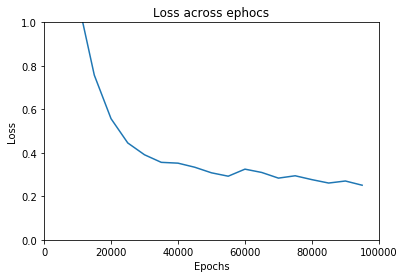

In [0]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 100000, 5000), loss_vector)
plt.axis([0, 100000, 0, 1])
plt.title('Loss across ephocs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Prediction:**

In [0]:
test_x = np.array(X_test)
test_y = np.array(y_test)
test_size = len(test_y)
vector_prediction=[]
vector_loss = []

for i in range(0, test_size):
  z1 = np.matmul(test_x[i],sess.run(W1)) + sess.run(b1)
  a1 = tf.nn.relu(z1)
  z2 = np.matmul(a1.eval(session=sess),sess.run(W2)) + sess.run(b2)
  y = tf.nn.relu(z2)

  prediction = y.eval(session=sess)[0]
  vector_prediction.append(prediction)
  vector_loss.append(pow(prediction - test_y[i][0], 2))
  print('prediction:', prediction, ', actual: ', test_y[i])

prediction: 17.17098186415044 , actual:  [16]
prediction: 15.284719617419961 , actual:  [14]
prediction: 15.472399932449868 , actual:  [15]
prediction: 10.119393574428477 , actual:  [10]
prediction: 13.11868190485415 , actual:  [14]
prediction: 12.136621818235927 , actual:  [13]
prediction: 9.835002321637374 , actual:  [10]
prediction: 12.234368354904598 , actual:  [10]
prediction: 5.352030190692695 , actual:  [6]
prediction: 12.030259633493149 , actual:  [13]
prediction: 6.384850374966333 , actual:  [6]
prediction: 17.528959128201578 , actual:  [18]
prediction: 11.430737324315018 , actual:  [10]
prediction: 15.772734025956233 , actual:  [15]
prediction: 10.40165388038271 , actual:  [11]
prediction: 9.260631604225754 , actual:  [8]
prediction: 11.894481165613955 , actual:  [11]
prediction: 10.519187134201509 , actual:  [11]
prediction: 10.416406549400657 , actual:  [9]
prediction: 8.80564328017319 , actual:  [0]
prediction: 10.127064251317234 , actual:  [10]
prediction: 12.285135786392

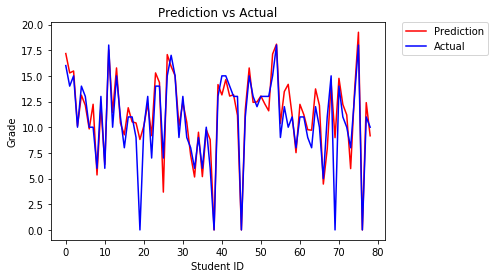

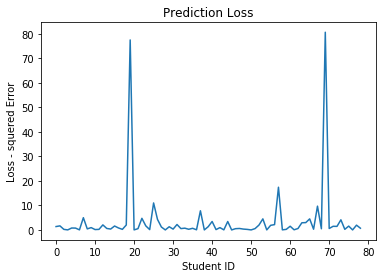

In [0]:
plt.plot(np.arange(0, test_size, 1), vector_prediction, color='red', label='Prediction')
plt.plot(np.arange(0, test_size, 1), test_y, color='blue', label='Actual')
plt.title('Prediction vs Actual')
plt.xlabel('Student ID')
plt.ylabel('Grade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


plt.plot(np.arange(0, test_size, 1), vector_loss)
plt.title('Prediction Loss')
plt.xlabel('Student ID')
plt.ylabel('Loss - squered Error')
plt.show()